
# **Named entity Recognition(NER)**
Named entity recognition (NER) is an important subtask of natural language processing (NLP) that aims to extract and categorize the entities contained in a text into predefined classes, such as names, organizations, and locations.

# **Category**

1. Persons (e.g., names of people) (Who)
2. Organizations (e.g., company names) (Who/Where/What)
3. Locations (e.g., cities, countries) (Where)
4. Dates and times
5. Monetary valuest item



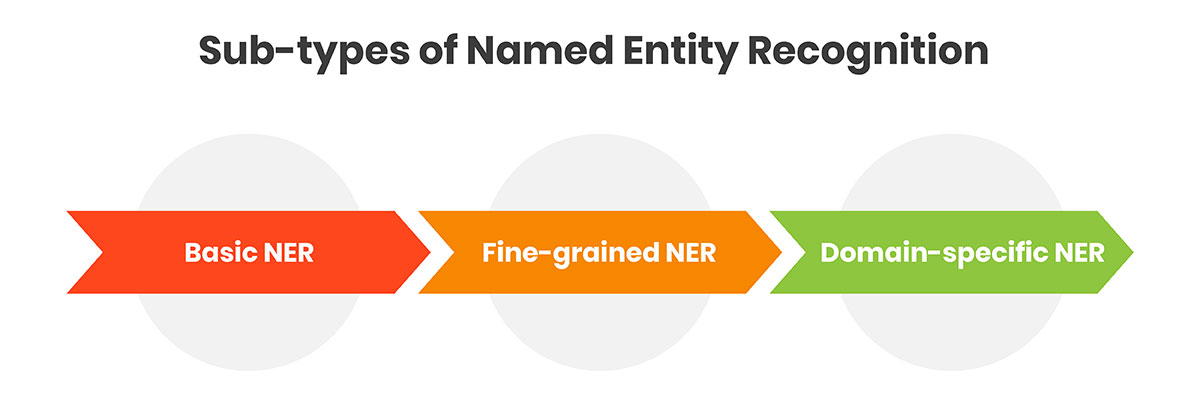

#**1. Basic NER:**

This is the most common form of NER, which identifies and classifies entities into predefined categories such as:

* Persons (e.g., "Barack Obama")
* Organizations (e.g., "Google")
* Locations (e.g., "New York")
Basic NER is **useful** for general text-processing tasks where a broad categorization of entities is sufficient.


# **2. Fine-grained NER:**

Unlike basic NER, fine-grained NER classifies entities into more specific sub-categories. For example:

1. Persons: politicians, actors, athletes
2. Organizations: companies, non-profits, government bodies
3. Locations: cities, countries, landmarks


# **3. Domain-specific NER:**

Tailored for specific industries or fields, domain-specific NER models are trained on specialized datasets to recognize entities unique to that domain. Examples include:

1. Biomedical NER: genes, proteins, diseases(covid)
2. Financial NER: stock symbols, financial instruments, economic indicators (GDP,inflation, Trade deficit)


#**Introduction to NLTK for NER**


In [ ]:
import nltk
from nltk import word_tokenize, pos_tag, ne_chunk
nltk.download('punkt')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
sentence = "Apple is looking at buying U.K. startup for $1 billion."
tokens = word_tokenize(sentence)
pos_tags = pos_tag(tokens)

In [ ]:
tokens
pos_tags

[('Apple', 'NNP'),
 ('is', 'VBZ'),
 ('looking', 'VBG'),
 ('at', 'IN'),
 ('buying', 'VBG'),
 ('U.K.', 'NNP'),
 ('startup', 'NN'),
 ('for', 'IN'),
 ('$', '$'),
 ('1', 'CD'),
 ('billion', 'CD'),
 ('.', '.')]

In [ ]:
import nltk
from nltk import word_tokenize, pos_tag, ne_chunk

# Download necessary resources
nltk.download('punkt')
nltk.download('maxent_ne_chunker')
nltk.download('words')

# Sample sentence
sentence = "Apple is looking at buying U.K. startup for $1 billion."

# Tokenize and POS tag
tokens = word_tokenize(sentence)
pos_tags = pos_tag(tokens)

# Perform NER
named_entities = ne_chunk(pos_tags)
print(named_entities)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


(S
  (GPE Apple/NNP)
  is/VBZ
  looking/VBG
  at/IN
  buying/VBG
  U.K./NNP
  startup/NN
  for/IN
  $/$
  1/CD
  billion/CD
  ./.)


#**Limitations of Using NLTK for NER**

*   Performance: NLTK uses classical machine learning methods for NER which may not be as accurate as deep learning methods. This means that the precision and recall rates in entity identification will be lower.
* Scalability: NLTK can be less efficient when dealing with big data and high-performance applications, thus it is not ideal for use in production environments that demand real-time processing.
*Flexibility: The library does not provide as many configuration and tuning parameters as more sophisticated libraries such as SpaCy; that allow users to define their pipelines and models.





#**Integrating NER with Sentiment Analysis**

In [ ]:
import nltk
from nltk import word_tokenize, pos_tag, ne_chunk
from textblob import TextBlob


# Sample sentence
sentence = "Apple is looking at buying U.K. startup for $1 billion. This will be a disaster."

# Tokenize and POS tag
tokens = word_tokenize(sentence)
pos_tags = pos_tag(tokens)

# Perform NER
named_entities = ne_chunk(pos_tags)

# Perform Sentiment Analysis
blob = TextBlob(sentence)
sentiment = blob.sentiment

# Print results
print("Named Entities:", named_entities)
print("Sentiment Analysis:", sentiment)



Named Entities: (S
  (GPE Apple/NNP)
  is/VBZ
  looking/VBG
  at/IN
  buying/VBG
  U.K./NNP
  startup/NN
  for/IN
  $/$
  1/CD
  billion/CD
  ./.
  This/DT
  will/MD
  be/VB
  a/DT
  disaster/NN
  ./.)
Sentiment Analysis: Sentiment(polarity=0.0, subjectivity=0.0)


#**Deep Learning Approaches to Named Entity Recognition**

*   Recurrent Neural Networks (RNNs)
*   Long Short-Term Memory Networks (LSTMs)
*   Transformers (e. g., BERT)




# **3. SpaCy**

SpaCy is a robust NLP library with built-in deep-learning models for NER.

In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("Apple is looking at buying U.K. startup for $1 billion.")
for ent in doc.ents:
  print(ent.text, ent.label_)

Apple ORG
U.K. GPE
$1 billion MONEY


In [ ]:
doc = nlp(u'May I go to Washington, DC next May to see the Washington Monument?')
if doc.ents:
        for ent in doc.ents:
            print(ent.text+' - '+ent.label_+' - '+str(spacy.explain(ent.label_)))
else:
        print('No named entities found.')

Washington, DC - GPE - Countries, cities, states
next May - DATE - Absolute or relative dates or periods
the Washington Monument - ORG - Companies, agencies, institutions, etc.


## Entity annotations
`Doc.ents` are token spans with their own set of annotations.
<table>
<tr><td>`ent.text`</td><td>The original entity text</td></tr>
<tr><td>`ent.label`</td><td>The entity type's hash value</td></tr>
<tr><td>`ent.label_`</td><td>The entity type's string description</td></tr>
<tr><td>`ent.start`</td><td>The token span's *start* index position in the Doc</td></tr>
<tr><td>`ent.end`</td><td>The token span's *stop* index position in the Doc</td></tr>
<tr><td>`ent.start_char`</td><td>The entity text's *start* index position in the Doc</td></tr>
<tr><td>`ent.end_char`</td><td>The entity text's *stop* index position in the Doc</td></tr>
</table>



In [ ]:
doc = nlp('Can I please borrow 500 dollars from you to buy some Microsoft stock?')

for ent in doc.ents:
    print(ent.text, ent.start, ent.end, ent.start_char, ent.end_char, ent.label_)

500 dollars 4 6 20 31 MONEY
Microsoft 11 12 53 62 ORG


## NER Tags
Tags are accessible through the `.label_` property of an entity.
<table>
<tr><th>TYPE</th><th>DESCRIPTION</th><th>EXAMPLE</th></tr>
<tr><td>`PERSON`</td><td>People, including fictional.</td><td>*Fred Flintstone*</td></tr>
<tr><td>`NORP`</td><td>Nationalities or religious or political groups.</td><td>*The Republican Party*</td></tr>
<tr><td>`FAC`</td><td>Buildings, airports, highways, bridges, etc.</td><td>*Logan International Airport, The Golden Gate*</td></tr>
<tr><td>`ORG`</td><td>Companies, agencies, institutions, etc.</td><td>*Microsoft, FBI, MIT*</td></tr>
<tr><td>`GPE`</td><td>Countries, cities, states.</td><td>*France, UAR, Chicago, Idaho*</td></tr>
<tr><td>`LOC`</td><td>Non-GPE locations, mountain ranges, bodies of water.</td><td>*Europe, Nile River, Midwest*</td></tr>
<tr><td>`PRODUCT`</td><td>Objects, vehicles, foods, etc. (Not services.)</td><td>*Formula 1*</td></tr>
<tr><td>`EVENT`</td><td>Named hurricanes, battles, wars, sports events, etc.</td><td>*Olympic Games*</td></tr>
<tr><td>`WORK_OF_ART`</td><td>Titles of books, songs, etc.</td><td>*The Mona Lisa*</td></tr>
<tr><td>`LAW`</td><td>Named documents made into laws.</td><td>*Roe v. Wade*</td></tr>
<tr><td>`LANGUAGE`</td><td>Any named language.</td><td>*English*</td></tr>
<tr><td>`DATE`</td><td>Absolute or relative dates or periods.</td><td>*20 July 1969*</td></tr>
<tr><td>`TIME`</td><td>Times smaller than a day.</td><td>*Four hours*</td></tr>
<tr><td>`PERCENT`</td><td>Percentage, including "%".</td><td>*Eighty percent*</td></tr>
<tr><td>`MONEY`</td><td>Monetary values, including unit.</td><td>*Twenty Cents*</td></tr>
<tr><td>`QUANTITY`</td><td>Measurements, as of weight or distance.</td><td>*Several kilometers, 55kg*</td></tr>
<tr><td>`ORDINAL`</td><td>"first", "second", etc.</td><td>*9th, Ninth*</td></tr>
<tr><td>`CARDINAL`</td><td>Numerals that do not fall under another type.</td><td>*2, Two, Fifty-two*</td></tr>
</table>